In [308]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [309]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
#optional settings:
# allows us to open the file in illustrator to edit stuff.
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12


In [310]:
data = pd.read_excel("../manuscript_data.xlsx", sheet_name="covariation")
data.head(3)

,Locality,Lithology,sample,Hg,TOC,Al,Fe,V
0,Shanggang,SHA,SHA 324 C+iso,15.9,0.453358,1.009523,0.851051,13.6
1,Shanggang,SHA,SHA 325 C+iso,4.3,0.048060,NaN,NaN,NaN
2,Shanggang,SHA,SHA 506 iso,6.4,0.028917,NaN,NaN,NaN


In [311]:
sha_Hg = data[data['Locality']=='Shanggang']['Hg']
qia_Hg = data[data['Locality']=='Qiakong']['Hg']
ja_Hg = data[data['Locality']=='Jebel Aweri']['Hg']
wm_Hg = data[data['Locality']=='Wadi Musjah']['Hg']

sha_TOC = data[data['Locality']=='Shanggang']['TOC']
qia_TOC = data[data['Locality']=='Qiakong']['TOC']
ja_TOC = data[data['Locality']=='Jebel Aweri']['TOC']
wm_TOC = data[data['Locality']=='Wadi Musjah']['TOC']

sha_Al = data[data['Locality']=='Shanggang']['Al']
qia_Al = data[data['Locality']=='Qiakong']['Al']
ja_Al = data[data['Locality']=='Jebel Aweri']['Al']
wm_Al = data[data['Locality']=='Wadi Musjah']['Al']

sha_Fe = data[data['Locality']=='Shanggang']['Fe']
qia_Fe = data[data['Locality']=='Qiakong']['Fe']
ja_Fe = data[data['Locality']=='Jebel Aweri']['Fe']
wm_Fe = data[data['Locality']=='Wadi Musjah']['Fe']

sha_V = data[data['Locality']=='Shanggang']['V']
qia_V = data[data['Locality']=='Qiakong']['V']

In [312]:
y=[sha_Hg, qia_Hg, ja_Hg, wm_Hg]
x1=[sha_TOC, qia_TOC, ja_TOC, wm_TOC]
x2=[sha_Al, qia_Al, ja_Al, wm_Al]
x3 = [sha_Fe, qia_Fe, ja_Fe, wm_Fe]
x4 = [sha_V, qia_V]

In [313]:
"""This function takes 2 inputs, x and y, and returns the corresponding rho and p values
calculated for the spearmans rank correlation function. x and y are lists of data for which this calculation is needed."""

def spearman(x, y):
    from scipy.stats import spearmanr
    out=[]
    for i in range(len(x)):
        rho, p =spearmanr(x[i], y[i], nan_policy='omit')
        result = rho, p
        out.append(result)
    df = pd.DataFrame(out, columns = ['rho', 'p'])
    return df

spearman(x1,y)

,rho,p
0,0.490468,0.000052
1,0.571443,0.000095
2,0.172519,0.493629
3,0.189394,0.482355


Calculate the Spearmans correlation coefficient for TOC, Al, Fe, V; and then export the results to different sheets of an existing excel file.

In [314]:
x_variable = [x1, x2, x3, x4]
count=['TOC','Al', 'Fe', 'V']
for i in range(len(x_variable)):
    result = spearman(x_variable[i], y)
    # export the stats to multiple sheets in existing excel file
    with pd.ExcelWriter("../spearman.xlsx",engine="openpyxl", mode='a', if_sheet_exists='overlay') as writer:
        result.to_excel(writer, sheet_name=f"output{count[i]}", index=True)
    # print(result)
    

In [315]:
Hg = data["Hg"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


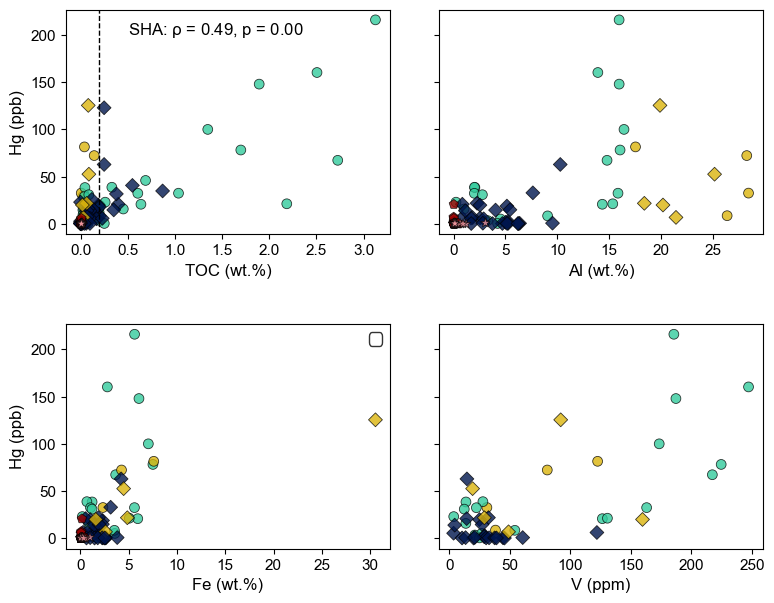

In [316]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,
                                figsize=(9, 7), sharey=True)
colors = ['#33cb9c', '#DBB40C', '#00164e', '#DBB40C', '#9b0000', '#ef959d']
markers = ['o','o', 'D','D', 'p','*']
fig.subplots_adjust(hspace=0.4, wspace=0.15)

#define the variables needed to iterably make the figures.
subs = ['TOC', 'Al', 'Fe', 'V']
ax = [ax0, ax1, ax2, ax3]
xlabels = [ "TOC (wt.%)", "Al (wt.%)", "Fe (wt.%)","V (ppm)"]
text = r'$\rho$'
# make subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=data, x=data[sub], y=Hg, ax=ax[ix],
                    color='black', edgecolor='black', legend=False,
                    s=50, hue='Lithology', palette=colors, alpha=0.8,
                    style='Lithology', markers=markers,
                    )
    ax[ix].tick_params(labelsize=11)
    ax[ix].set_xlabel(xlabels[ix], fontsize=12)
    ax[ix].set_ylabel("Hg (ppb)", fontsize=12)
ax0.axvline(x=0.2, linestyle='--', color='black', linewidth=1)
ax0.annotate(f'SHA: {text} = 0.49, p = 0.00',(0.5,200))
ax2.legend(loc='upper right', edgecolor='black')
# plt.savefig("../plots/covariation.pdf")


In [317]:
df = pd.read_excel('../manuscript_data.xlsx', sheet_name="Nd_Sr")
df.head(2)

,Locality,sample,Sr,Sr_2se,Nd(t),Nd_2se,Nd143_144
0,Qiakong,Q130,0.708199,0.000057,-7.155361,0.133041,0.512169
1,Qiakong,Q133,0.708341,0.000026,-6.358442,0.076262,0.512210


In [318]:
data_path = "../SSB_literature_Hg_data.xlsx"
save_path = '../plots/'
iso = pd.read_excel(data_path, sheet_name="iso_data")
iso.head(3)


,Locality,Author,sample,d202Hg,D199Hg,D200Hg,D201Hg
0,Chaohu,Wang et al. 2019,CH26-1,-1.196602,0.163477,0.011747,0.034643
1,Chaohu,Wang et al. 2019,CH27-5,-1.438952,0.091963,0.030875,-0.031976
2,Chaohu,Wang et al. 2019,CH31-2,-0.887090,0.111021,0.024028,0.013100


In [319]:
markers2 = ['D', 'p', '*']
Sr=df.Sr
Nd=df["Nd(t)"]


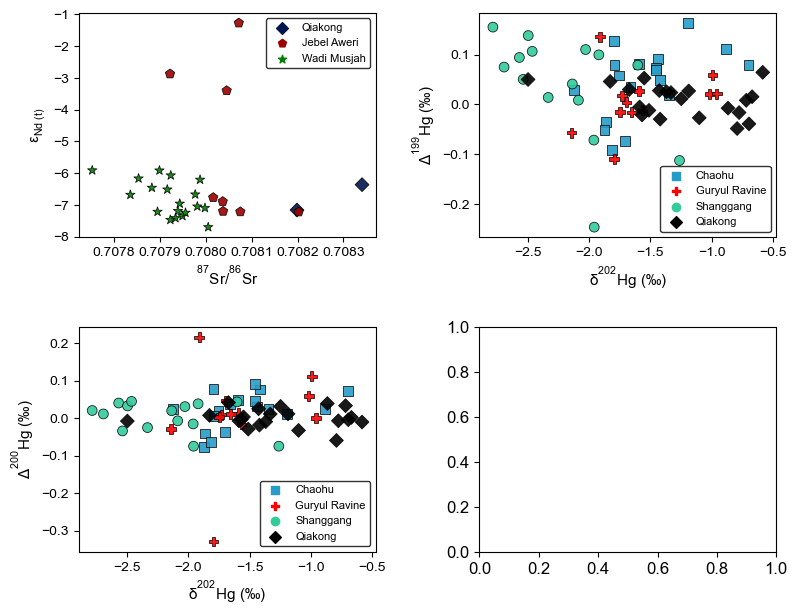

In [320]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(9, 7), sharey=False)

x_labels = [r"$^{87}Sr/^{86}Sr$", r"$\delta^{202}Hg\;(‰)$",]
y_labels = [r"$\epsilon_{Nd\;(t)}$", r"$\Delta^{199}Hg\;(‰)$", r"$\Delta^{200}Hg\;(‰)$"]
sub1_colors = [colors[2], colors[4], 'green']
sub2_colors = ["#289cc9", 'red', '#33cb9c', 'black']


def make_subplots(dataset, x, y, ax, colors, markers, x_label, y_label, location):
    fig.subplots_adjust(hspace=0.4, wspace=0.35)
    sns.scatterplot(data=dataset, x=x, y=y, ax=ax,
                    color='black', edgecolor='black', legend=True,
                    s=50, hue='Locality', palette=colors, alpha=0.9,
                    style='Locality', markers=markers,
                    )
    ax.tick_params(labelsize=10)
    ax.set_xlabel(x_label, fontsize=11)
    ax.set_ylabel(y_label, fontsize=11)
    ax.legend(loc=location, edgecolor='black', frameon=True,fontsize=8, ncol=1)

make_subplots(df, Sr, Nd, ax0, sub1_colors, markers2, x_labels[0], y_labels[0], "upper right")
make_subplots(iso, iso['d202Hg'], iso['D199Hg'], ax1, sub2_colors,
              ['s', 'P', 'o', 'D'], x_labels[1], y_labels[1], "lower right")
make_subplots(iso, iso['d202Hg'], iso['D200Hg'], ax2, sub2_colors,
              ['s', 'P', 'o', 'D'], x_labels[1], y_labels[2], "lower right")

# plt.savefig(f'{save_path}hg-iso_Nd-Sr.pdf', dpi=600)